=== Sales Summary ===
                                product  total_quantity  total_revenue
0                 1984 by George Orwell               4          79.96
1               Adidas 3-Stripes Shorts               5         149.95
2          Adidas Essential Track Pants               3         134.97
3        Adidas FIFA World Cup Football               3          89.97
4   Adidas Originals Superstar Sneakers               4         319.96
5       Adidas Originals Trefoil Hoodie               4         259.96
6       Adidas Ultraboost Running Shoes               2         359.98
7               Adidas Ultraboost Shoes               2         359.98
8             Amazon Echo Dot (4th Gen)               4         199.96
9                   Amazon Echo Show 10               1         249.99
10              Amazon Fire TV Stick 4K               3         149.97
11     Anastasia Beverly Hills Brow Wiz               2          46.00
12     Anker PowerCore Portable Charger               4

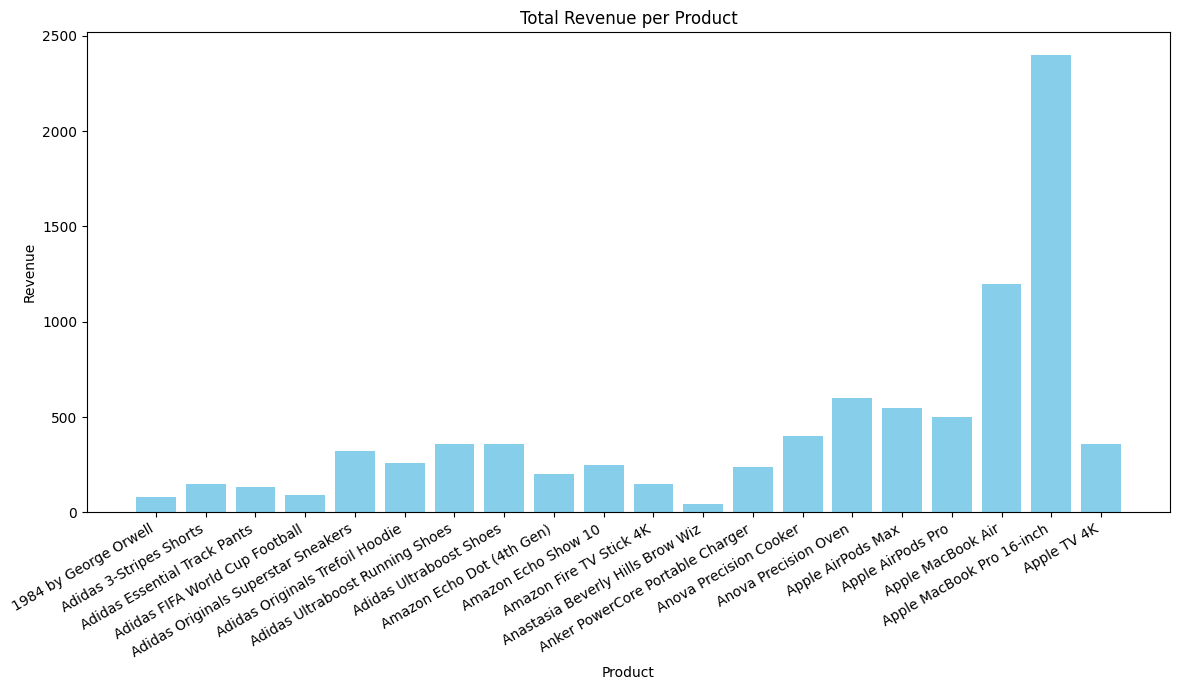


Total Revenue from all products: 80567.85


In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect("sales_data.db")  # Make sure this file is in your working directory

# Step 2: SQL Query to get total quantity and total revenue per product
query = """
SELECT Product_Name AS product, 
       SUM(quantity_sold) AS total_quantity, 
       SUM(quantity_sold * Unit_Price) AS total_revenue
FROM sales
GROUP BY product
LIMIT 20
"""

# Step 3: Run the query and store result in a DataFrame
df = pd.read_sql_query(query, conn)

# Step 4: Display results
print("=== Sales Summary ===")
print(df)

# Step 5: Plot bar chart for revenue
plt.figure(figsize=(12, 7))
plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Total Revenue per Product")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

total = pd.read_sql_query("SELECT SUM(quantity_sold * Unit_Price) AS total_revenue FROM sales", conn)
print("\nTotal Revenue from all products:", total['total_revenue'][0])

          Region   revenue
0           Asia  22455.45
1         Europe  21268.06
2  North America  36844.34


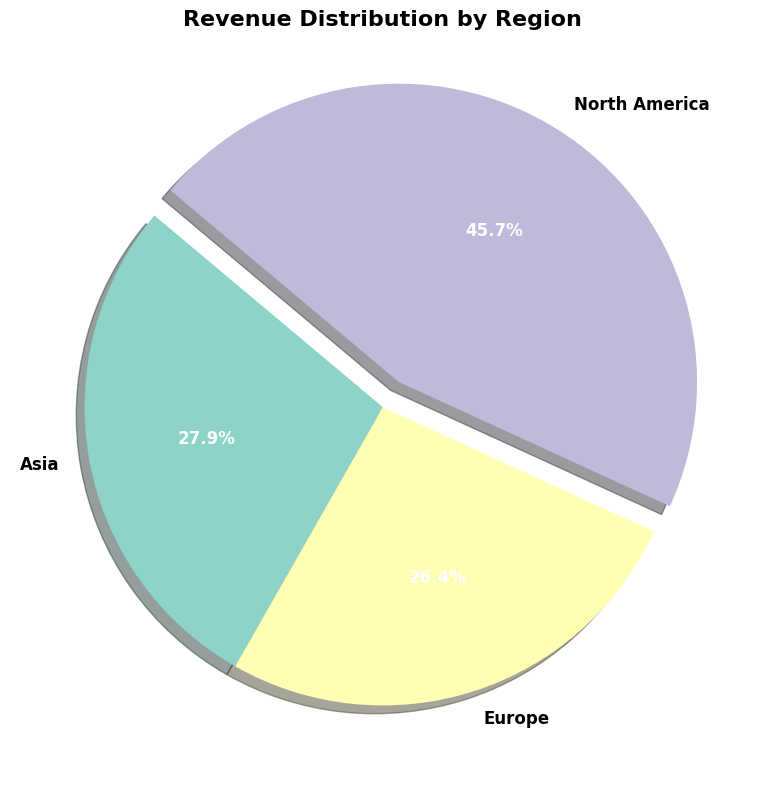

In [24]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT Region, SUM(quantity_Sold * Unit_Price) AS revenue
FROM sales
GROUP BY Region
"""
df = pd.read_sql_query(query, conn)
print(df)

# Custom colors
colors = plt.cm.Set3.colors  # ya aap koi bhi list de sakte ho

# Explode to highlight top region
explode = [0.1 if rev == df['revenue'].max() else 0 for rev in df['revenue']]

# Pie chart
plt.figure(figsize=(8,8))
patches, texts, autotexts = plt.pie(
    df['revenue'],
    labels=df['Region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Title styling
plt.title("Revenue Distribution by Region", fontsize=16, fontweight='bold')

# Label font styling
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('semibold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()